In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Causality

Our methods for comparing two samples have a powerful use in the analysis of randomized controlled experiments. Since the treatment and control groups are assigned randomly in such experiements, differences in their outcomes can be compared to what would happen just due to chance if the treatment had no effect at all. If the observed differences are more marked than what we would predict as purely due to chance, we will have evidence of *causation*. Because of the unbiased assignment of individuals to the treatment and control groups, differences in the outcomes of the two groups can be ascribed to the treatment.

我们的比较两个样本的方法在随机对照实验的分析中有强大的应用。因为在这样的实验中，实验组和对照组是随机分配的，所以它们的结果差异可以与实验无作用（仅由偶然因素影响）的情况进行比较。如果观察到的差异比我们预测的纯粹偶然的情况更为显著，我们就会有因果关系的证据。由于对个体是被随机地分配给对照组和实验组的，两组结果差异可以归因于实验。

The key to the analysis of randomized controlled experiments is understanding exactly how chance enters the picture. This helps us set up clear null and alternative hypotheses. Once that's done, we can simply use the methods of the previous sections to complete the analysis.

随机对照实验分析的关键是准确理解偶然因素是如何作用的。这可以帮助我们建立明确的零假设和备择假设。一旦完成，我们可以简单地使用前几节的方法来完成分析。

Let's see how to do this in an example.

我们通过一个例子来看怎么做。


## Treating Chronic Back Pain: A Randomized Controlled Trial
Low-back pain in adults can be very persistent and hard to treat. Common methods run the gamut from corticosteroids to acupuncture. A [randomized controlled trial (RCT)](https://www.ncbi.nlm.nih.gov/pubmed/11376175) examined the effect of using Botulinum Toxin A (BTA) as a treatment. Botulinum toxin is a neurotoxic protein that causes the disease botulism; [Wikipedia](https://en.wikipedia.org/wiki/Botulinum_toxin) says that botulinum "is the most acutely lethal toxin known." There are seven types of botulinum toxin. Botulinum Toxin A is one of the types that can cause disease in humans, but it is also used in medicine to treat various diseases involving the muscles. The RCT analyzed by Foster, Clapp, and Jabbari in 2001 examined it as a treatment for low back pain.

成年人的下背痛可能非常持久且难以治疗。常见的方法有皮质类固醇或针灸等。一项[随机对照试验 (RCT)](https://www.ncbi.nlm.nih.gov/pubmed/11376175) 检验了使用肉毒杆菌毒素 A (BTA) 治疗的效果。肉毒杆菌毒素是一种神经毒素蛋白，会导致肉毒病；[维基百科](https://en.wikipedia.org/wiki/Botulinum_toxin) 表示肉毒杆菌毒素 "是最急性致命的毒素之一"。肉毒杆菌毒素有七种类型。肉毒杆菌毒素 A 是能在人类中引起疾病的类型之一，但它也用于医学上治疗肌肉相关的各种疾病。2001 年，Foster、Clapp 和 Jabbari 进行的一项随机对照试验检验了它治疗下背痛的效果。

Thirty one patients with low-back pain were randomized into treatment and control groups, with 15 in the treatment group and 16 in control. The control group was given normal saline, and the trials were run double-blind so that neither doctors nor patients knew which group they were in.

31 名下背痛患者被随机分为实验组和对照组，其中 15 名在实验组，16 名在对照组。对照组给予生理盐水，并且试验是双盲的，即医生和患者都不知道自己属于哪个组。

Eight weeks after the start of the study, nine of the 15 in the treatment group and two of the 16 in the control group had pain relief (according to a precise definition used by the researchers). These data are in the table `bta` and appear to show that the treatment has a clear benefit.

研究开始后八周，治疗组 15 名中有 9 名和对照组 16 名中有 2 名获得了疼痛缓解（根据研究人员使用的精确定义）。这些数据在 `bta` 表格中，似乎表明治疗有明显的好处。


In [2]:
bta = Table.read_table(path_data + 'bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


Let's see how many patients recovered in each group. Remember that counting is the same as adding zeros and ones. The sum of 1's in the control group is the number of control group patients who had pain relief. 

让我们看看每个组中有多少患者恢复了。记住，计数就是添加零和一。对照组中 1 的总和就是对照组中疼痛缓解的患者数量。


In [3]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


Since counting is the same as the *sum* of zeros and ones, the *proportion* of patients who had pain relief is the *average* of zeros and ones. It is the sum divided by the total number of patients in each group.

既然计数就是求一系列零和一的*总和*，那么疼痛缓解的患者的*比例*就是这些零和一的*平均值*。这也就是每个组中患者总数除以总和。


In [4]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In the treatment group, 60% of the patients had pain relief, compared to only 12.5% in the control group. None of the patients suffered any side effects. 

在治疗组中，有 60% 的患者的疼痛得到缓解，而对照组中只有 12.5%。没有患者遭受任何副作用。

So the indications are that botulinum toxin A did better than the saline. But the conclusion isn't yet a slam-dunk. The patients were assigned at random into the two groups, so perhaps the difference could just be due to chance?

因此，迹象表明肉毒杆菌毒素 A 的效果优于生理盐水。但结论还不是绝对的。患者被随机分配到两个组中，所以这种差异可能仅仅是偶然的？

To understand what this means, we have to consider the possibility that among the 31 patients in the study, some were simply better able to recover than others, even without any help from the treatment. What if an unusually large proportion of such patients got assigned to the treatment group, just by chance? Then even if the treatment did nothing more than the saline in the control group, the results of the treatment group might look better than those of the control group. 

为了理解这是什么意思，我们必须考虑一种可能性：在研究的 31 名患者中，有些患者即使没有治疗的帮助，也更容易恢复。如果恰好有异常多的这类患者被分配到实验组，那该怎么办呢？那么，即使治疗的效果与对照组中的生理盐水一样，实验组的结果可能看起来也会比对照组好。

To account for this possibility, let's start by carefully setting up the chance model.

为了考虑这种可能性，我们首先需要细致地建立偶然模型。


## Potential Outcomes
Before the patients are randomized into the two groups, our minds instinctively imagine two possible outcomes for each patient: the outcome that the patient would have if assigned to the treatment group, and the outcome that the same patient would have if assigned to the control group. These are called the two *potential outcomes* of the patient.

在患者被随机分配到两个组之前，我们本能地在脑海中想象出每个患者可能出现的两种结果：如果被分配到对照组，患者会出现的结果；以及如果被分配到对照组，同一个患者会出现的结果。这些被称为患者的两个*潜在结果*。

Thus there are 31 potential treatment outcomes and 31 potential control outcomes. The question is about the distributions of these two sets of 31 outcomes each. Are they the same, or are they different?

因此，有 31 个潜在的实验组结果和 31 个潜在的对照组结果。问题是关于这两组各 31 个结果的分布。它们是相同的，还是不同的？

We can't answer this just yet, because we don't get to see all 31 values in each group. We just get to see a randomly selected 16 of the potential control outcomes, and the treatment outcomes of *the remaining* 15 patients. 

我们还不能回答这个问题，因为我们看不到每个组中的所有 31 个值。我们只能看到随机选择的 16 个潜在对照组结果，以及*剩余* 15 名患者的实验组结果。

Here is a good way to visualize the setting. Each patient has a two-sided ticket:

这里有一个很好的方法来将这个设定可视化。每一个患者都有一张双面票：

![Two-sided ticket](../../../images/causality1.png)

After the randomization, we get to see the right half of a randomly selected set of tickets, and the left half of the remaining group.

随机化之后，我们可以看到随机选择的一组双面票的右半部分，以及剩下一组的左半部分。

![Half-tickets](../../../images/causality2.png)

The table `observed_outcomes` collects the information about every patient's potential outcomes, leaving the unobserved half of each "ticket" blank.  (It's just another way of thinking about the `bta` table, carrying the same information.)

`observed_outcomes` 表格收集了关于每个患者潜在结果的信息，每个 "票" 未观察到的半部分留为空白。（这只是另一种思考 `bta` 表格的方式，携带相同的信息。）


In [5]:
observed_outcomes = Table.read_table(path_data + "observed_outcomes.csv")
observed_outcomes.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


## The Hypotheses
The question is whether the treatment does anything. In terms of the table `observed_outcomes`, the question is whether the distribution of the 31 "treatment" values in Column 1  (including the unknown ones) is different from the distribution of the 31 "control" values in Column 2 (again including the unknown ones).

问题是治疗是否有作用。在 `observed_outcomes` 表格的背景下，问题是第 1 列中 31 个 "实验" 值的分布（包括未知的）是否与第 2 列中 31 个 "对照" 值的分布（同样包括未知的）不同。

**Null Hypothesis:** The distribution of all 31 potential "treatment" outcomes is the same as that of all 31 potential "control" outcomes. Botulinum toxin A does nothing different from saline; the difference in the two samples is just due to chance.

**零假设：**所有 31 个潜在 "实验" 结果的分布与所有 31 个潜在 "对照" 结果的分布相同。肉毒杆菌毒素 A 与生理盐水没有区别；两组之间的差异仅仅是由于偶然。

**Alternative Hypothesis:** The distribution of 31 potential "treatment" outcomes is different from that of the 31 control outcomes. The treatment does something different from the control.

**备择假设：**31 个潜在 "实验" 结果的分布与 31 个对照结果的分布不同。治疗与对照不同。

Notice that the alternative is not specifying that the treatment helps – just that it is different from the control. This is standard in medical studies because it doesn't pre-judge which way the result might go. But you are welcome to run a test for whether the treatment does better than the control. Just adjust your test statistic accordingly.

注意备择假设并没有指定治疗是否有帮助 - 只是指它与对照不同。这在医学研究中是标准的，因为它没有预先判断结果可能的方向。但你可以进行一个测试，看治疗是否比对照好。只需相应地调整你的测试统计量。

There are 31 observed outcomes jointly in the two groups. If the null hypothesis were true, it wouldn't matter which of those 31 outcomes were labeled "treatment" and which "control." Any random subset of 16 out of the 31 values could be called "control" and the remaining 15 "treatment".

两组共有 31 个观察结果。如果零假设是正确的，那么将这 31 个结果中的哪些标记为 "实验" 哪些标记为 "对照" 并不重要。31 个值中的任意 16 个子集都可以被称为 "对照"，其余 15 个为 "实验"。

We can simulate this. We can randomly permute the 31 values, split them into two groups of 16 and 15, and see how different the distributions in the two groups are. Since the data are zeros and ones, we can just see how different the two proportions are. 

我们可以模拟这种情况。我们可以随机排列这 31 个值，将它们分成两个组，一个 16 个，一个 15 个，看看两个组的分布有多么不同。由于数据是零和一，我们只需看看两个比例有多么不同。

That's exactly what we did for A/B testing in the previous section. Sample A is now the control group and Sample B the treatment group. We will carry out the test below showing the details of all the steps. You should confirm that they are the same as the steps carried out for A/B testing.

这与我们之前在 A/B 测试中做的完全一样。样本 A 现在是对照组，样本 B 是实验组。我们将在下面进行测试，展示所有步骤的细节。你应该确认它们与 A/B 测试中执行的步骤相同。

## The Test Statistic
If the two group proportions are very different from each other, we will lean towards the alternative hypothesis that the two underlying distributions are different. So our test statistic will be the distance between the two group proportions, that is, the absolute value of the difference between them.

如果两个组别的比例彼此差异很大，我们将倾向于备择假设，即两个潜在分布是不同的。因此，我们的测试统计量将是两个组别比例之间的距离，即它们之间的绝对差值。

Large values of the test statistic will favor the alternative hypothesis over the null.

测试统计量的大值将有利于备择假设而不是零假设。

Since the two group proportions were 0.6 and 0.125, the observed value of the test statistic is $\vert 0.6 - 0.125 \vert = 0.475$. 

由于两个组别的比例分别是 0.6 和 0.125，测试统计量的观察值是 $\vert 0.6 - 0.125 \vert = 0.475$。


In [6]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [7]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

As we have done before, we will define a function that takes the following two arguments:

- the name of the table of data
- the column label of the group labels

正如我们以前做过的，我们定义一个函数，它接受以下参数：

- 数据表名
- 组标签的列标签

and returns the distance between the two group proportions.

并且返回两个组比例的距离。


In [8]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [9]:
distance(bta, 'Group')

0.475

## Predicting the Statistic Under the Null Hypothesis
We can simulate results under the null hypothesis, to see how our test statistic should come out if the null hypothesis is true.

我们可以在零假设下模拟结果，来观察如果零假设为真时检验统计量应该如何。

### Generating One Value of the Statistic
The simulation follows exactly the same process we used in the previous section. We start by randomly permuting the all group labels and then attaching the shuffled labels to the 0/1 results.

模拟的过程和前一节的完全一样。我们首先将组标签随机排列然后将打乱的标签分配给 0 或者 1。


In [10]:
shuffled_labels = bta.sample(with_replacement=False).column(0)

In [11]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

Group,Result,Shuffled Label
Control,1,Treatment
Control,1,Control
Control,0,Treatment
Control,0,Control
Control,0,Control
Control,0,Treatment
Control,0,Treatment
Control,0,Control
Control,0,Treatment
Control,0,Control


We can now find the distance between the two proportions after the group labels have been shuffled.

在组标签被打乱后，我们可以求出两个比例之间的距离。


In [12]:
distance(bta_with_shuffled_labels, 'Shuffled Label')

0.08750000000000002

This is quite different from the distance between the two original proportions.

这与原来两个比例之间的距离大不相同。


In [13]:
distance(bta_with_shuffled_labels, 'Group')

0.475

### Permutation Test
If we shuffled the labels again, how different would the new distance be? To answer this, we will define a function that simulates one simulated value of the distance under the hypothesis of random draws from the same underlying distribution. And then we will collect 20,000 such simulated values in an array.

如果我们再次打乱标签，新的距离会有多不同？为了回答这个问题，我们将定义一个函数，该函数在假设从同一潜在分布中随机抽取的情况下模拟一个距离的值。然后我们将在一个数组中收集 20,000 个这样的模拟值。

You can see that we are doing exactly what we did in our previous examples of the permutation test. 

你可以看到我们就是在做之前例子中的置换试验。


In [14]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement = False
                                                    ).column('Group')
    shuffled_table = bta.select('Result').with_column(
        'Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label') 

In [15]:
distances = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

## Conclusion of the Test
The array `distances` contains 20,000 values of our test statistic simulated under the null hypothesis. Here is their empirical histogram along with the observed value of the statistic. To find the P-value of the test, remember that large values of the distance favor the alternative hypothesis. 

`distances` 数组包含了 20000 个零假设下模拟得到的检验统计量。这是它们的经验分布直方图以及统计量的观测值。为了得出试验的 P 值，记住距离较大则倾向于备择假设。


Observed Distance 0.475


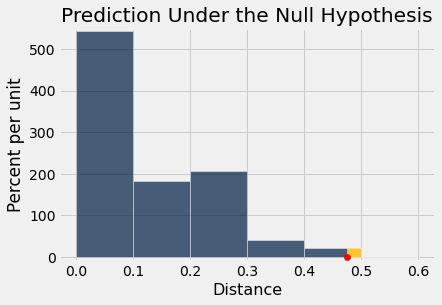

In [16]:
Table().with_column('Distance', distances).hist(
    bins = np.arange(0, 0.7, 0.1), left_end = observed_distance)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 5.5)
plots.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)

To find the empirical p-value numerically, we must find the proportion of simulated statistics that were equal to or larger than the observed statistic.

为了从数值上求得经验 p 值，我们必须求出大于等于观测到的统计量的模拟统计量的比例。


In [17]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.00875

This is a small p-value. The observed statistic is in the tail of the empirical histogram of the test statistic generated under the null hypothesis.

这是一个小的 p 值。观测到的统计量在经验直方图的尾部。

The result is statistically significant. The test favors the alternative hypothesis over the null. The evidence supports the hypothesis that the treatment is doing something.

结果是统计显著的。

The study reports a P-value of 0.009, or 0.9%, which is not far from our empirical value. 

研究表明 P 值为 0.9%，这和经验值相差不大。


## Causality
Because the trials were randomized, the test is evidence that the treatment *causes* the difference. The random assignment of patients to the two groups ensures that there is no confounding variable that could affect the conclusion of causality.

由于试验是随机的，测试证明了治疗*导致*了差异。将患者随机分配到两个组中确保了没有可能影响因果结论的混杂变量。

If the treatment had not been randomly assigned, our test would still point toward an *association* between the treatment and back pain outcomes among our 31 patients.  But beware: without randomization, this association would not imply that the treatment caused a change in back pain outcomes.  For example, if the patients themselves had chosen whether to administer the treatment, perhaps the patients experiencing more pain would be more likely to choose the treatment *and* more likely to experience some reduction in pain even without medication.  Pre-existing pain would then be a *confounding factor* in the analysis.

如果没有被随机分配得到实验组，我们的测试仍然会指向治疗和我们的 31 名患者的背痛结果之间的*关联*。但是要小心：没有随机化，这种关联并不意味着治疗导致了背痛结果的变化。例如，如果患者自己选择是否接受治疗，可能经历更多疼痛的患者更倾向于选择治疗*并且*即使没有药物也更可能经历疼痛的某种减轻。预先存在的疼痛在这种情况下将成为分析中的*混杂因素*。


## A Meta-Analysis

While the RCT does provide evidence that the botulinum toxin A treatment helped patients, a study of 31 patients isn't enough to establish the effectiveness of a medical treatment. This is not just because of the small sample size.  Our results in this section are valid for the 31 patients in the study, but we are really interested in the population of *all possible patients*.

虽然随机对照试验确实提供了肉毒杆菌毒素 A 治疗帮助患者的证据，但 31 名患者的研究不足以建立医疗治疗的有效性。这不仅仅是因为样本量少。我们本节的结果对于研究中的 31 名患者是有效的，但我们真正感兴趣的是*所有可能患者*的总体。

In 2011, a group of researchers performed a [meta-analysis](https://www.ncbi.nlm.nih.gov/pubmed/21249702) of the studies on the treatment. That is, they identified all the available studies of such treatments for low-back pain and summarized the collated results. 

2011 年，一组研究人员对治疗进行了[综合分析](https://www.ncbi.nlm.nih.gov/pubmed/21249702)。也就是说，他们确定了所有可用的治疗下背痛的研究，并总结了汇总结果。

There were several studies but not many could be included in a scientifically sound manner: "We excluded evidence from nineteen studies due to non-randomisation, incomplete or unpublished data." Only three randomized controlled trials remained, one of which is the one we have studied in this section. The meta-analysis gave it the highest assessment among all the studies (LBP stands for low-back pain): "We identified three studies that investigated the merits of BoNT for LBP, but only one had a low risk of bias and evaluated patients with non-specific LBP (N = 31)." 

有几项研究，但并非所有研究都能以科学合理的方式被包括在内："由于非随机化、数据不完整或未发表，我们排除了十九项研究的证据。" 只剩下三项随机对照试验，其中之一就是我们本节研究的内容。荟萃分析在所有研究中对其进行了最高的评估（LBP 代表下背痛）："我们确定了三项研究，探讨了 BoNT 用于 LBP 的优点，但只有一项具有低偏见风险并评估了非特异性 LBP 患者（N = 31）。"

Putting it all together, the meta-analysis concluded, "There is low quality evidence that BoNT injections improved pain, function, or both better than saline injections and very low quality evidence that they were better than acupuncture or steroid injections. ...  Further research is very likely to have an important impact on the estimate of effect and our confidence in it. Future trials should standardize patient populations, treatment protocols and comparison groups, enlist more participants and include long-term outcomes, cost-benefit analysis and clinical relevance of findings."

综合来看，综合分析得出结论："有低质量证据表明 BoNT 注射比生理盐水注射更能改善疼痛、功能或两者兼有，有非常低质量的证据表明它们比针灸或类固醇注射更好。……进一步的研究很可能会对效应估计及其可信度产生重要影响。未来的试验应该标准化患者群体、治疗协议和比较组，招募更多参与者，并包括长期结果、成本效益分析和临床发现的临床相关性。"

It takes a lot of careful work to establish that a medical treatment has a beneficial effect. Knowing how to analyze randomized controlled trials is a crucial part of this work. Now that you know how to do that, you are well positioned to help medical and other professions establish cause-and-effect relations.

确认医疗治疗的有益效果需要大量的细致工作。知道如何分析随机对照试验是这项工作的关键部分。现在你了解了如何做到这一点，你将能够帮助医疗和其他职业建立因果关系的证据。
